In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('./data/full_data.csv',decimal=",")

In [58]:
df.head()

,Logische Periode,Endzeitstempel,Wert,Status,Tarif,location,adress
0,01.01.2019,07:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin"
1,01.01.2019,08:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin"
2,01.01.2019,09:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin"
3,01.01.2019,10:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin"
4,01.01.2019,11:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin"


In [59]:
df.shape,df.columns

((47416, 7),
 Index(['Logische Periode ', ' Endzeitstempel ', ' Wert ', ' Status ',
        ' Tarif ', 'location', 'adress'],
       dtype='object'))

In [60]:
df['datetime'] = df['Logische Periode ']+' '+df[' Endzeitstempel ']
df['datetime'] = pd.to_datetime(df.datetime, format='%d.%m.%Y %H:%M:%S')

In [61]:
import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
#     fld_dtype = fld.dtypes[0]
    
#     if not np.issubdtype(fld_dtype, np.datetime64):
#         df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'
           ]
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [62]:
add_datepart(df,'datetime',time=True,drop=False)
df.head()

,Logische Periode,Endzeitstempel,Wert,Status,Tarif,location,adress,datetime,datetimeYear,datetimeMonth,datetimeWeek,datetimeDay,datetimeDayofweek,datetimeDayofyear,datetimeHour,datetimeMinute,datetimeSecond,datetimeElapsed
0,01.01.2019,07:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin",2019-01-01 07:00:00,2019,1,1,1,1,1,7,0,0,1546326000
1,01.01.2019,08:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin",2019-01-01 08:00:00,2019,1,1,1,1,1,8,0,0,1546329600
2,01.01.2019,09:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin",2019-01-01 09:00:00,2019,1,1,1,1,1,9,0,0,1546333200
3,01.01.2019,10:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin",2019-01-01 10:00:00,2019,1,1,1,1,1,10,0,0,1546336800
4,01.01.2019,11:00:00,0.0,N,,Bottroper Weg,"Bottroper Weg 8, 13507 Berlin",2019-01-01 11:00:00,2019,1,1,1,1,1,11,0,0,1546340400


In [63]:
df['Wert'] = df[' Wert ']
del df[' Wert ']
df.columns

Index(['Logische Periode ', ' Endzeitstempel ', ' Status ', ' Tarif ',
       'location', 'adress', 'datetime', 'datetimeYear', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeHour', 'datetimeMinute', 'datetimeSecond', 'datetimeElapsed',
       'Wert'],
      dtype='object')

In [64]:
set(df.datetimeMonth)

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [65]:
df = df.loc[:,['Wert', 'location', 'datetimeYear', 'datetimeMonth', 'datetimeWeek',
       'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear', 'datetimeHour',
       'datetimeMinute', 'datetimeSecond', 'datetimeElapsed', ]].dropna()

valid_idx =[idx for idx,month,day in zip(range(len(df)),list(df.datetimeMonth),list(df.datetimeDayofweek)) if (month >7 or day == 6)] 
print(len(valid_idx), len(df), len(valid_idx)/len(df))
print(valid_idx[-100:])
print(df.shape)

12426 47314 0.26262839751447775
[47214, 47215, 47216, 47217, 47218, 47219, 47220, 47221, 47222, 47223, 47224, 47225, 47226, 47227, 47228, 47229, 47230, 47231, 47232, 47233, 47234, 47235, 47236, 47237, 47238, 47239, 47240, 47241, 47242, 47243, 47244, 47245, 47246, 47247, 47248, 47249, 47250, 47251, 47252, 47253, 47254, 47255, 47256, 47257, 47258, 47259, 47260, 47261, 47262, 47263, 47264, 47265, 47266, 47267, 47268, 47269, 47270, 47271, 47272, 47273, 47274, 47275, 47276, 47277, 47278, 47279, 47280, 47281, 47282, 47283, 47284, 47285, 47286, 47287, 47288, 47289, 47290, 47291, 47292, 47293, 47294, 47295, 47296, 47297, 47298, 47299, 47300, 47301, 47302, 47303, 47304, 47305, 47306, 47307, 47308, 47309, 47310, 47311, 47312, 47313]
(47314, 12)


In [66]:
from fastai import *
from fastai.tabular import *

In [67]:
print(len(valid_idx),df.shape)
cat_names = ['location','datetimeMonth','datetimeDayofweek' ]
dep_var = 'Wert'

12426 (47314, 12)


In [68]:
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('data', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [69]:
learn = tabular_learner(data,[32,32],metrics=mean_absolute_error,
#                         ,emb_szs={'City':5,'Country':5},
                        callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


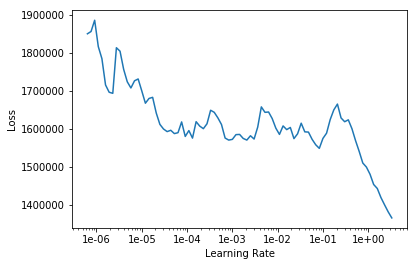

In [70]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,111736.039062,44947.550781,119.476082,00:04


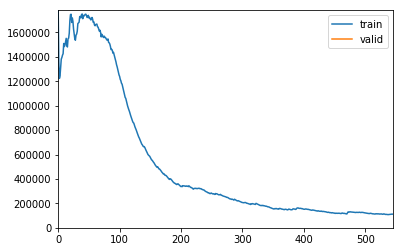

In [71]:
learn.fit_one_cycle(1,1e-1)

In [72]:
learn.validate()

[44947.55, tensor(119.4761)]

In [123]:
print(df.iloc[1111,:])
learn.predict(df.iloc[1111,:])

AverageTemperature           28.449
City                        Abidjan
Country               Côte D'Ivoire
dtYear                         1958
dtMonth                           3
dtWeek                            9
dtDay                             1
dtDayofweek                       5
dtDayofyear                      60
dtElapsed                -373593600
Name: 1310, dtype: object


(FloatItem [27.449913], tensor([27.4499]), tensor([27.4499]))

TODO interpert where errors are